In [40]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

inpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'
outpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'

alg_list = ["LR", "SVC", "MLP", "RF"]
datasets = "-ALL-"
ds_list = ["transfus_yes", "transfus_hyster", "trans_loss"]

In [41]:
lr_roc = pd.read_csv(inpath + "LR" + datasets + "ROC-Results.csv")
ty = lr_roc[lr_roc['target']=='transfus_yes']
ty_max = ty['ROC_AUC'].max()

### ROC Plots

In [42]:
alg_roc_df = pd.DataFrame(index=ds_list, columns=alg_list)
alg_roc_df

,LR,SVC,MLP,RF
transfus_yes,NaN,NaN,NaN,NaN
transfus_hyster,NaN,NaN,NaN,NaN
trans_loss,NaN,NaN,NaN,NaN


In [43]:
for alg in alg_list:
    for ds in ds_list:
        this_df = pd.read_csv(inpath + alg + datasets + "ROC-Results.csv")
        ds_df = this_df[this_df['target'] == ds]
        ds_max = ds_df['ROC_AUC'].max()
        alg_roc_df.loc[ds,alg] = ds_max
alg_roc_df        

,LR,SVC,MLP,RF
transfus_yes,0.8127,0.8143,0.8101,0.8159
transfus_hyster,0.8048,0.8067,0.8025,0.8099
trans_loss,0.7437,0.7642,0.7725,0.7661


<Figure size 432x288 with 0 Axes>

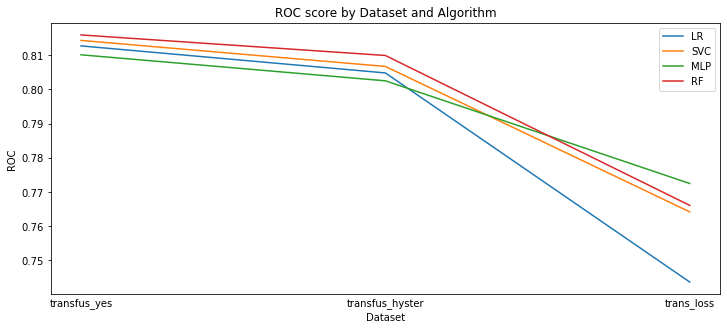

In [44]:
fig = plt.figure()
ax = alg_roc_df.plot(figsize=(12,5), title="ROC score by Dataset and Algorithm")
ax.set_ylabel("ROC")
ax.set_xlabel("Dataset")
ax.tick_params(axis='x',length=0)

Text(0.5, 0, 'Dataset')

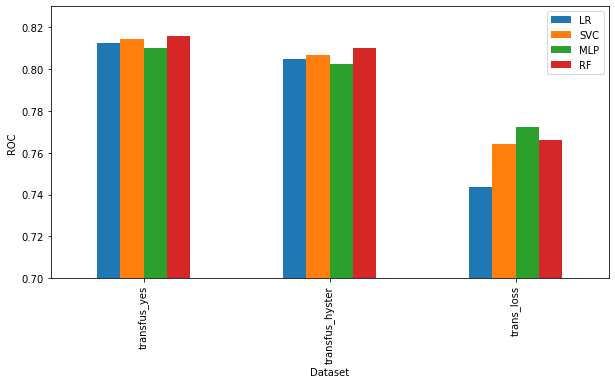

In [45]:
ax = alg_roc_df.plot.bar(ylim=(0.7,0.83), figsize=(10,5))
ax.set_ylabel("ROC")
ax.set_xlabel("Dataset")

In [46]:
my_df = pd.read_csv(inpath + 'RF' + datasets + "ROC-Results.csv")
seeds = my_df['seed'].unique()
ds_seed_df = pd.DataFrame(index=ds_list, columns=seeds)
ds_seed_df

,1,7,17
transfus_yes,NaN,NaN,NaN
transfus_hyster,NaN,NaN,NaN
trans_loss,NaN,NaN,NaN


In [47]:
for seed in seeds:
    for ds in ds_list:
        seed_df = my_df[(my_df['target'] == ds) & (my_df['seed'] == seed)]
        max_roc = seed_df['ROC_AUC'].max()
        ds_seed_df.loc[ds,seed] = max_roc
        #print(f'seed:{seed}; max_roc:{max_roc}')
        
ds_seed_df

,1,7,17
transfus_yes,0.8159,0.8137,0.8127
transfus_hyster,0.8083,0.8073,0.8099
trans_loss,0.7638,0.7661,0.7654


<Figure size 432x288 with 0 Axes>

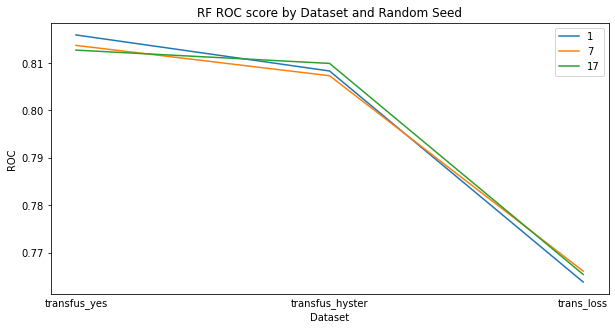

In [48]:
fig = plt.figure()
ax = ds_seed_df.plot(title="RF ROC score by Dataset and Random Seed", figsize=(10,5))
ax.set_ylabel("ROC")
ax.set_xlabel("Dataset")
ax.tick_params(axis='x',length=0)

In [49]:
rand_seed_df = pd.DataFrame(columns=seeds)
rand_seed_df

,1,7,17


In [50]:
for seed in seeds:
    seed_df = pd.DataFrame(my_df[(my_df['target'] == 'transfus_yes') & (my_df['seed'] == seed)])
    print(seed_df[['seed','ROC_AUC']])
    top_roc = seed_df['ROC_AUC'].sort_values(ascending=False).head(16)
    print(f'seed:{seed}; top_roc:{top_roc}')
    rand_seed_df[seed] = top_roc.values
        
rand_seed_df

    seed  ROC_AUC
0      1   0.8159
1      1   0.8159
2      1   0.8143
3      1   0.8143
4      1   0.8143
5      1   0.8143
6      1   0.8140
7      1   0.8140
8      1   0.8137
10     1   0.8137
12     1   0.8133
13     1   0.8133
14     1   0.8133
15     1   0.8133
16     1   0.8128
17     1   0.8128
18     1   0.8128
30     1   0.8117
31     1   0.8117
33     1   0.8115
34     1   0.8115
35     1   0.8115
44     1   0.8096
47     1   0.8096
50     1   0.8095
51     1   0.8094
52     1   0.8094
53     1   0.8094
62     1   0.8085
63     1   0.8084
64     1   0.8084
67     1   0.8080
68     1   0.8077
69     1   0.8077
seed:1; top_roc:0     0.8159
1     0.8159
2     0.8143
3     0.8143
4     0.8143
5     0.8143
6     0.8140
7     0.8140
8     0.8137
10    0.8137
12    0.8133
13    0.8133
14    0.8133
15    0.8133
17    0.8128
16    0.8128
Name: ROC_AUC, dtype: float64
    seed  ROC_AUC
9      7   0.8137
11     7   0.8137
20     7   0.8127
22     7   0.8127
23     7   0.8127
25     7

,1,7,17
0,0.8159,0.8137,0.8127
1,0.8159,0.8137,0.8127
2,0.8143,0.8127,0.8127
3,0.8143,0.8127,0.8127
4,0.8143,0.8127,0.8117
5,0.8143,0.8127,0.8117
6,0.8140,0.8124,0.8108
7,0.8140,0.8124,0.8108
8,0.8137,0.8098,0.8101
9,0.8137,0.8098,0.8101


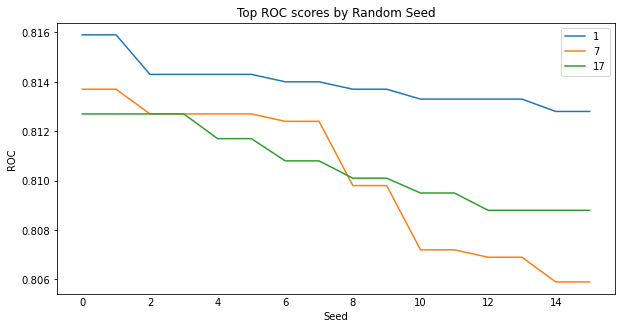

In [51]:
ax = rand_seed_df.plot(title="Top ROC scores by Random Seed", figsize=(10,5))
ax.set_ylabel("ROC")
ax.set_xlabel("Seed")
ax.tick_params(axis='x',length=0)

In [54]:
for alg in alg_list:
    ds = 'transfus_yes'
    this_df = pd.read_csv(inpath + alg + datasets + "ROC-Results.csv")
    seeds = this_df['seed'].unique()
    ty_df = this_df[this_df['target'] == ds]
    ds_max = ty_df['ROC_AUC'].max()
    alg_roc_df.loc[ds,alg] = ds_max
alg_roc_df        

,LR,SVC,MLP,RF
transfus_yes,0.8127,0.8143,0.8101,0.8159
transfus_hyster,0.8048,0.8067,0.8025,0.8099
trans_loss,0.7437,0.7642,0.7725,0.7661


In [55]:
merged_df = pd.DataFrame()
for alg in alg_list:
    if merged_df.empty:
        full_df = pd.read_csv(inpath + alg + datasets + "coef_rank.csv", index_col=0)
        merged_df = pd.DataFrame(full_df['mean_rank'])
        merged_df.rename(columns={'mean_rank':alg}, inplace=True)
    else:
        full_df = pd.read_csv(inpath + alg + datasets + "coef_rank.csv", index_col=0)
        this_df = pd.DataFrame(full_df['mean_rank'])
        this_df.rename(columns={'mean_rank':alg}, inplace=True)
        merged_df = merged_df.merge(this_df, left_index=True, right_index=True, how="right")
        
merged_df

,LR,SVC,MLP,RF
Intratocolytix,15,10,2,1
Inoxy_incrdose,48,46,42,2
Education,29,29,5,3
DMControl,27,26,43,4
HospElectCS,19,25,35,5
HosEpiNurse,2,3,4,6
Delmode,14,17,1,7
Admcontract,43,47,26,8
BESTGA,21,11,29,9
Admconsistency,28,31,25,10


In [56]:
merged_df['mean_rank'] = merged_df.apply(np.mean, axis=1).rank().astype(int)
merged_df.sort_values('mean_rank', inplace=True)
merged_df

,LR,SVC,MLP,RF,mean_rank
HosEpiNurse,2,3,4,6,1
Intratocolytix,15,10,2,1,2
Delmode,14,17,1,7,3
Anteanemia,5,5,3,29,4
IntraMgSO,6,13,7,20,5
abruption,3,6,13,25,6
previa9,4,2,17,36,7
previa_chart,7,7,14,35,8
Education,29,29,5,3,9
abruptio9,9,8,6,43,9


Text(0, 0.5, 'Mean Rank')

<Figure size 432x288 with 0 Axes>

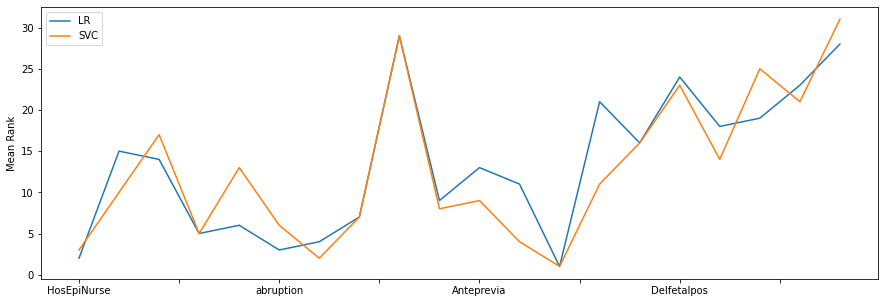

In [61]:
#top20 = merged_df.iloc[:20,:4]
#top20 = merged_df.iloc[:20,2:4]
top20 = merged_df.iloc[:20,0:2]
fig = plt.figure()
ax = top20.plot(figsize=(15,5))
ax.set_ylabel("Mean Rank")

Text(0, 0.5, 'Mean Rank')

<Figure size 432x288 with 0 Axes>

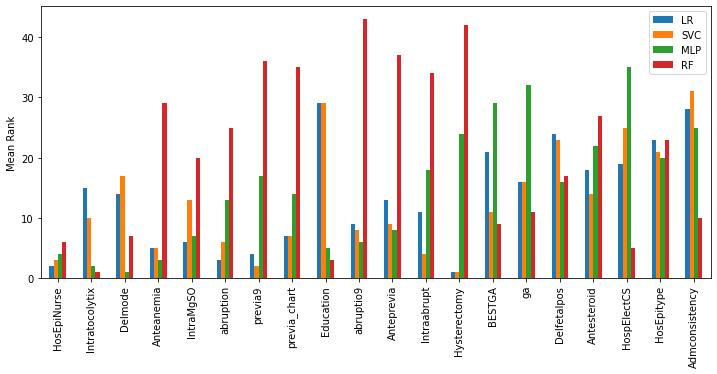

In [58]:
top20 = merged_df.iloc[:20,:4]
fig = plt.figure()
ax = top20.plot.bar(figsize=(12,5))
ax.set_ylabel("Mean Rank")